# Titanic EDA and Classification   

<a id='1'></a><br>
# Data Load And Check

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns  

from collections import Counter

import warnings
warnings.filterwarnings("ignore")


from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [3]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")


train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


 <a id='2'></a><br>
## 1-Outlier Detection


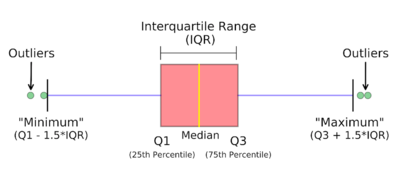

* Q1 = 1.Quartile 25%
* Q2 = 2.Quartile 50% (median)
* Q3 = 3.Quartile 75%
* IQR = Q3 - Q1
* Outlier data = (Q1 - 1.5 IQR ) U (Q3 + 1.5 IQR)



In [6]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
def outlier_detect(feature, data):
    outlier_index = []

    for each in feature:
        Q1 = np.percentile(data[each], 25)
        Q3 = np.percentile(data[each], 75)
        IQR = Q3 - Q1
        min_quartile = Q1 - 1.5*IQR
        max_quartile = Q3 + 1.5*IQR
        outlier_list = data[(data[each] < min_quartile) | (data[each] > max_quartile)].index
        outlier_index.extend(outlier_list)
        
    outlier_index = Counter(outlier_index)
    #If there are three or more outlier data features we must delete them. (n)
    outlier_data = list(i for i, n in outlier_index.items() if n > 3)
    return outlier_data

In [8]:
outlier_data = outlier_detect(["Age","SibSp","Parch","Fare"], train_data)
train_data.loc[outlier_data]


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [9]:
train_data = train_data.drop(outlier_data, axis=0).reset_index(drop=True)

<a id='3'></a><br>
## 2-Combining Train and Test Data


* Train_data and test_data are combined so that data is obtained. 


In [10]:
data = pd.concat([train_data, test_data], axis=0).reset_index(drop=True)

<a id='4'></a><br>
## 3-Feature Analysis

### Survived

<Axes: xlabel='Survived', ylabel='count'>

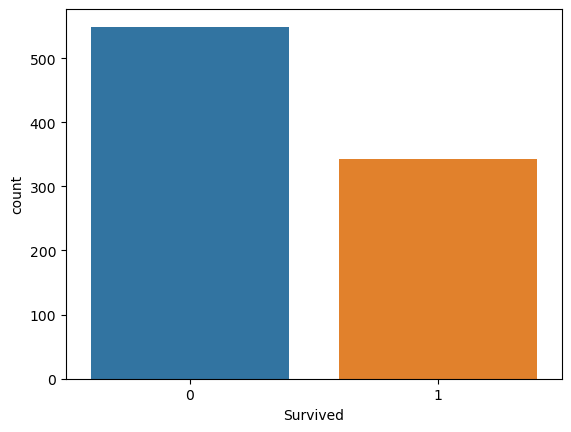

In [12]:
sns.countplot(x='Survived',data=train_data )


In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,891.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,0.383838,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.486592,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,0.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,1.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,1.000000,3.000000,80.000000,8.000000,9.000000,512.329200


<a id='5'></a><br>
# Data Analysis

* Feature Analysis
* Corelation Between Features



<a id='6'></a><br>
## 1- Feature Analysis

* Sex - Survived
* Pclass - Survived
* Embarked - Survived
* SibSp - Survived
* Parch - Survived
* Age - Survived
* Fare - Survived

### Sex - Survived

Female are more likely to survive than male.

In [14]:
data[["Sex", "Survived"]].groupby(["Sex"], as_index = False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


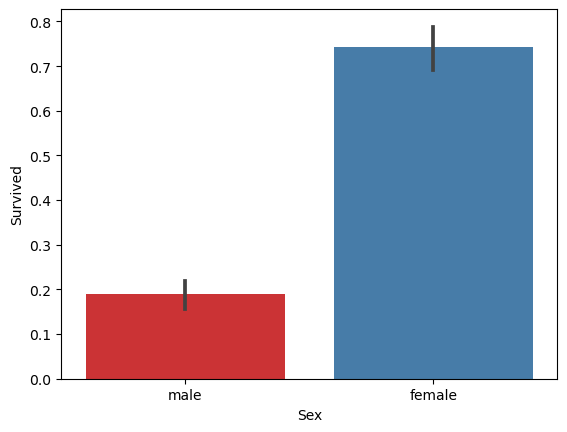

In [28]:
sns.barplot(x="Sex", y="Survived", data=data, palette="Set1")
plt.show()

### Pclass - Survived

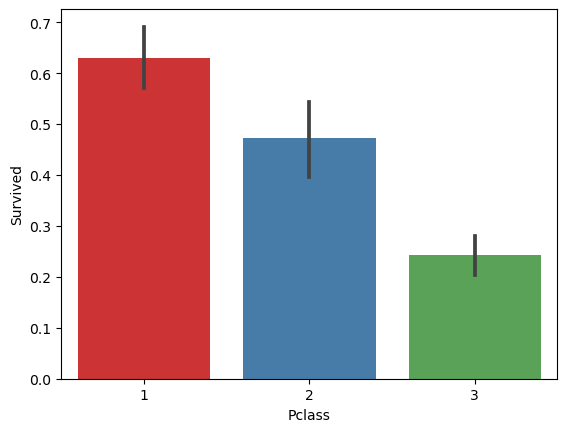

In [30]:
sns.barplot(x="Pclass", y ="Survived", data=data, palette="Set1")
plt.show()

### Embarked - Survived

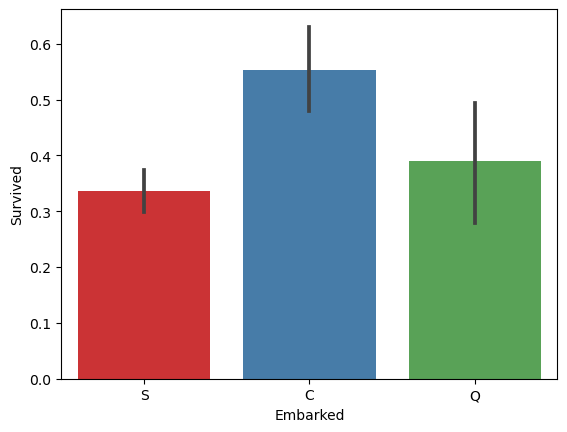

In [31]:
sns.barplot(x="Embarked", y ="Survived", data=data, palette="Set1")
plt.show()

### SibSp - Survived

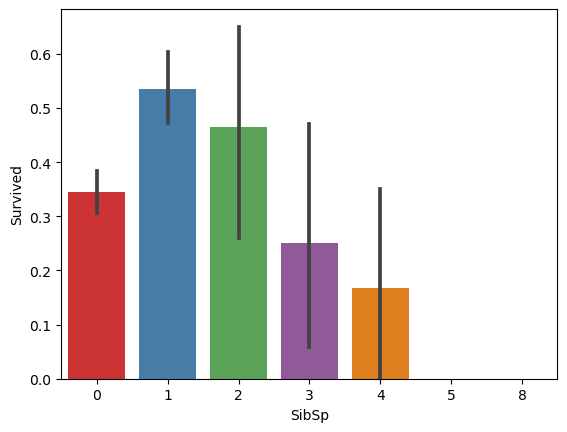

In [32]:
sns.barplot(x="SibSp", y ="Survived", data=data, palette="Set1")
plt.show()

### Parch - Survived

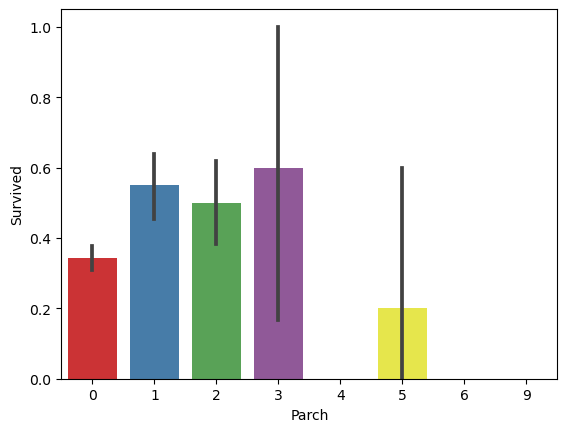

In [33]:
sns.barplot(x="Parch", y ="Survived", data=data, palette="Set1")
plt.show()

 ### Age - Survived

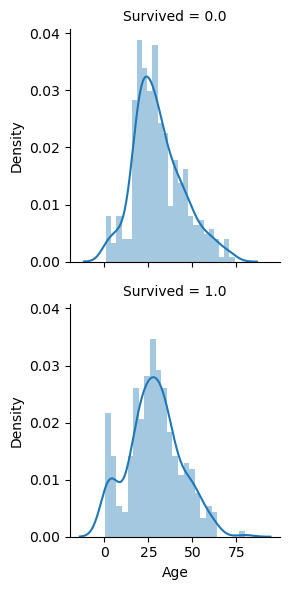

In [34]:
g = sns.FacetGrid(data, row="Survived")
g.map(sns.distplot, "Age", bins=25)
plt.show()

 ### Fare - Survived

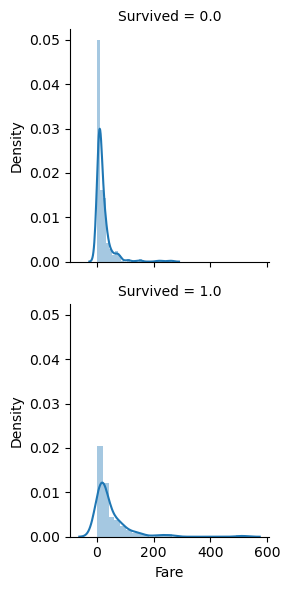

In [35]:
g = sns.FacetGrid(data, row="Survived")
g.map(sns.distplot, "Fare", bins=25)
plt.show()

<a id='7'></a><br>
## 2-Correlation Between Features

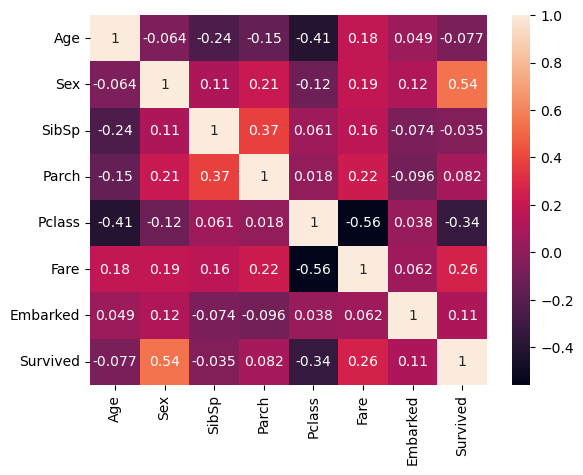

In [36]:
#data["Sex"] = [0 if i == "male" else 1 for i in data["Sex"]]
data['Sex'].replace(['male','female'],[0,1],inplace=True)
data['Embarked'].replace(['S','C','Q'],[0,1,2],inplace=True)
# male: 0, famela: 1
sns.heatmap(data[["Age","Sex","SibSp","Parch","Pclass","Fare","Embarked", "Survived"]].corr(), annot = True)
plt.show()

**Outcome**    

* Sex, Pclass, Fare and Embarked are associated with Survived. 




<a id='8'></a><br>
# Missing Value

* Find Missing Value
* Fill Missing Value


<a id='9'></a><br>
## 1-Find Missing Value

* Age, Fare and Cabin have missing value. Therefore we are looking at the correlation matrix.

Correlation Matrix
* Pclass is associated with Fare.
* Embarked is not associated with any feature.
* Pclass and SibSp are associated with Age.

In [37]:
data.columns[data.isnull().any()]

Index(['Survived', 'Age', 'Fare', 'Cabin', 'Embarked'], dtype='object')

In [38]:
data.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

<a id='10'></a><br>
## 2-Fill Missing Value

* Cabin has 1007 missing value
* Age has 256 missing value
* Embarked has 2 missing value
* Fare has 1 missing value

Not: Survived has 418 missing value (only test value)

### Fare Fill Value

Pclass is associated with Fare.

In [39]:
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1043,1044,NaN,3,"Storey, Mr. Thomas",0,60.5,0,0,3701,NaN,NaN,0.0


In [40]:
data["Fare"] = data["Fare"].fillna(np.mean(data[((data["Pclass"]==3) & (data["Embarked"]==0))]["Fare"]))
data[data["Fare"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Embarked Fill Value

Embarked is not associated with any feature.

S = 0,  C = 1 and Q = 2

In [41]:
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1.0,1,"Icard, Miss. Amelie",1,38.0,0,0,113572,80.0,B28,NaN
829,830,1.0,1,"Stone, Mrs. George Nelson (Martha Evelyn)",1,62.0,0,0,113572,80.0,B28,NaN


In [42]:
data["Embarked"] = data["Embarked"].fillna(1)
data[data["Embarked"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


### Age Fill Value

Pclass and SibSp are associated with Age.

In [43]:
data[data["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0.0,3,"Moran, Mr. James",0,NaN,0,0,330877,8.4583,NaN,2.0
17,18,1.0,2,"Williams, Mr. Charles Eugene",0,NaN,0,0,244373,13.0000,NaN,0.0
19,20,1.0,3,"Masselmani, Mrs. Fatima",1,NaN,0,0,2649,7.2250,NaN,1.0
26,27,0.0,3,"Emir, Mr. Farred Chehab",0,NaN,0,0,2631,7.2250,NaN,1.0
28,29,1.0,3,"O'Dwyer, Miss. Ellen ""Nellie""",1,NaN,0,0,330959,7.8792,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1299,1300,NaN,3,"Riordan, Miss. Johanna Hannah""""",1,NaN,0,0,334915,7.7208,NaN,2.0
1301,1302,NaN,3,"Naughton, Miss. Hannah",1,NaN,0,0,365237,7.7500,NaN,2.0
1304,1305,NaN,3,"Spector, Mr. Woolf",0,NaN,0,0,A.5. 3236,8.0500,NaN,0.0
1307,1308,NaN,3,"Ware, Mr. Frederick",0,NaN,0,0,359309,8.0500,NaN,0.0


In [44]:
data_age_nan_index = data[data["Age"].isnull()].index
for i in data_age_nan_index:
    mean_age = data["Age"][(data["Pclass"]==data.iloc[i]["Pclass"])].median()
    data["Age"].iloc[i] = mean_age

<a id='8'></a><br>
# Data Engineering

* New Feature
* Edit Feature
* Drop Feature
* Normalization

<a id='12'></a><br>
# 1-New - Feature
* Alone and Family
* Title (Name)
* Age Limit
* Fare Limit

### Alone and Family 
* SibSp + Parch = family

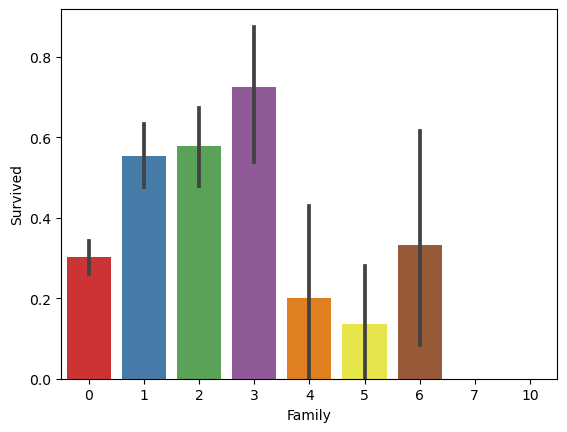

In [46]:
data["Family"] = data["SibSp"] + data["Parch"]
sns.barplot(x="Family", y ="Survived", data=data, palette="Set1")
plt.show()

In [47]:
data["Alone"] = [1 if i == 0 else 0 for i in data["Family"]]
data["Family"].replace([0,1,2,3,4,5,6,7,10], [0,1,1,1,0,2,0,2,2], inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Family,Alone
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0,1,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0,1,0
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0,0,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0,1,0
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0,0,1


### Name - Title

In [48]:
data['Title']=data.Name.str.extract('([A-Za-z]+)\.')

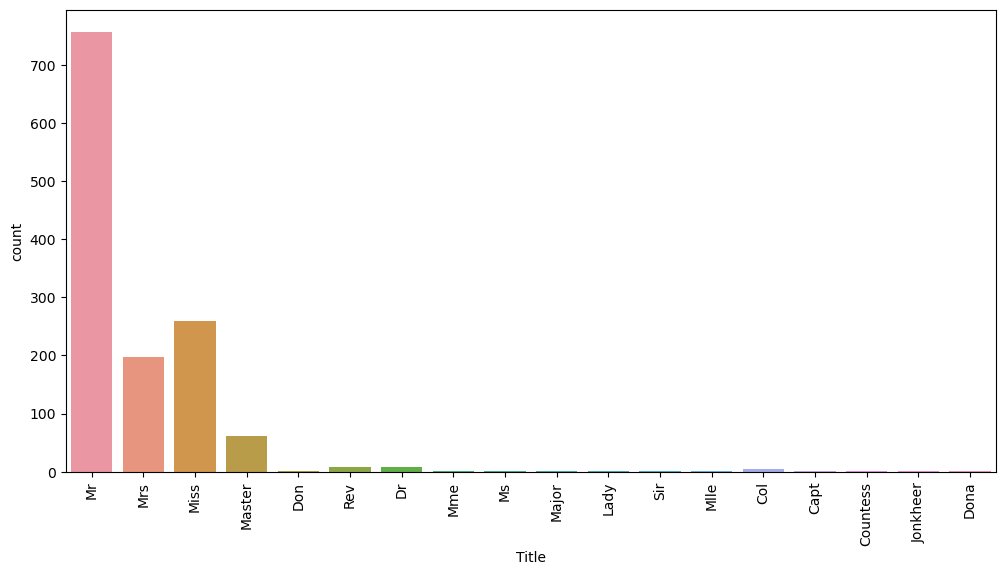

In [50]:
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(data=data, x="Title")
plt.xticks(rotation=90)
plt.show()

In [51]:
data['Title'].replace(['Mme','Ms','Mlle','Lady','Countess','Dona','Dr','Major','Sir','Capt','Don','Rev','Col', 'Jonkheer'],['Miss','Miss','Miss','Mrs','Mrs','Mrs','Mr','Mr','Mr','Mr','Mr','Other','Other','Other'], inplace=True)

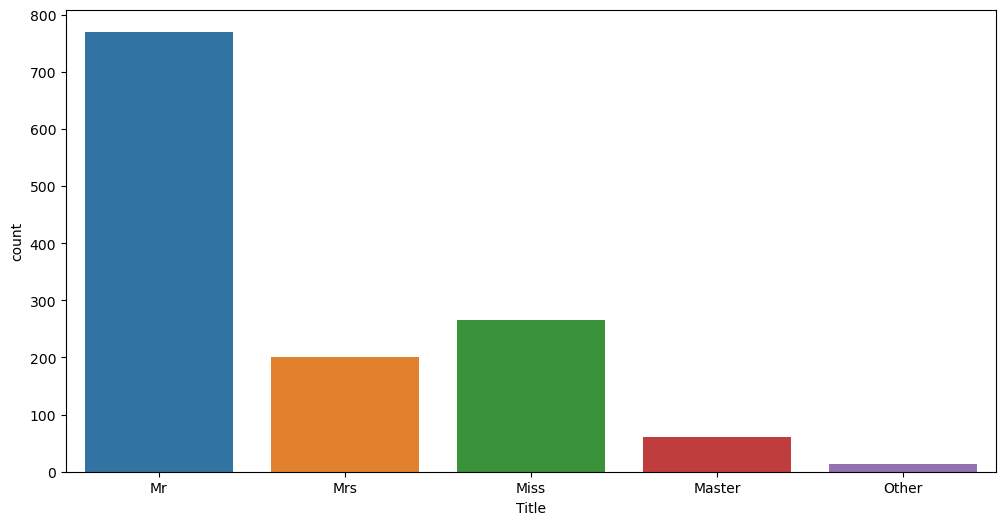

In [53]:
plt.figure(figsize=(12, 6))  # Adjust the figure size
sns.countplot(data=data, x="Title")
plt.show()

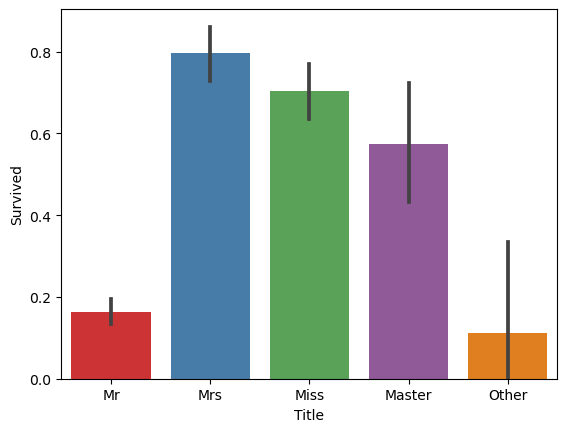

In [55]:
sns.barplot(x="Title", y ="Survived", data=data,palette="Set1")
plt.show()

In [56]:
data["Title"].replace(["Mr","Mrs","Miss","Master","Other"], [1,2,2,3,1], inplace=True)


### Age Limit

In [57]:
data['Age_Limit']=pd.cut(data['Age'], 5)
data.groupby(['Age_Limit'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Age_Limit,
"(0.0902, 16.136]",0.550000
"(16.136, 32.102]",0.336714
"(32.102, 48.068]",0.412844
"(48.068, 64.034]",0.434783
"(64.034, 80.0]",0.090909


In [58]:
data['Age_Limit'] = LabelEncoder().fit_transform(data['Age_Limit'])


### Fare Limit

In [59]:
data['Fare_Limit']=pd.qcut(data['Fare'],4)
data.groupby(['Fare_Limit'])['Survived'].mean().to_frame().style.background_gradient(cmap='summer_r')

,Survived
Fare_Limit,
"(-0.001, 7.896]",0.197309
"(7.896, 14.454]",0.303571
"(14.454, 31.275]",0.441048
"(31.275, 512.329]",0.600000


In [60]:
data['Fare_Limit'] = LabelEncoder().fit_transform(data['Fare_Limit'])


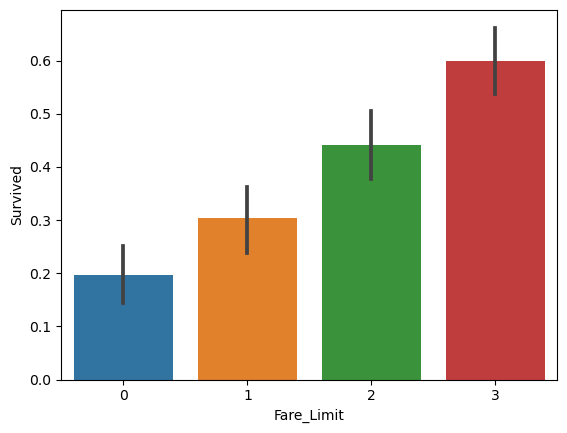

In [61]:
sns.barplot(x="Fare_Limit", y ="Survived", data=data)
plt.show()

### Correlation Matrix

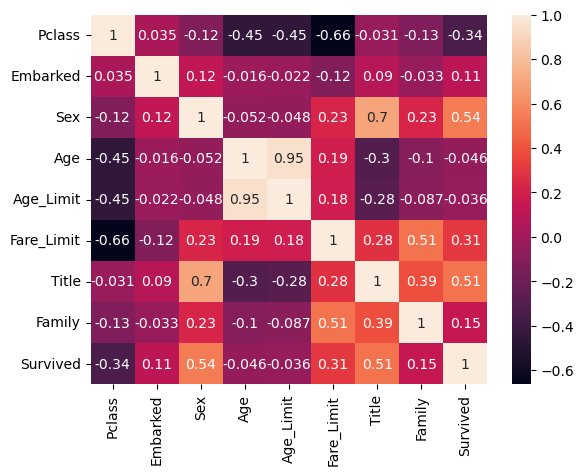

In [62]:
sns.heatmap(data[["Cabin","Pclass","Embarked","Sex","Age","Age_Limit","Fare_Limit", "Title","Family", "Survived"]].corr(), annot = True)
plt.show()

<a id='13'></a><br>
## 2- Drop Features
* Ticket, Cabin, Name, PassengerId and Age are deleted according to the result of the correlation matrix.

In [63]:
data['Age']=data['Age'].astype(int)

data.drop(labels=["SibSp","Parch","Cabin","Fare","Age", "Ticket", "Name", "PassengerId"], axis=1, inplace = True)
data.head()

,Survived,Pclass,Sex,Embarked,Family,Alone,Title,Age_Limit,Fare_Limit
0,0.0,3,0,0.0,1,0,1,1,0
1,1.0,1,1,1.0,1,0,2,2,3
2,1.0,3,1,0.0,0,1,2,1,1
3,1.0,1,1,0.0,1,0,2,2,3
4,0.0,3,0,0.0,0,1,1,2,1


<a id='14'></a><br>
## 3 - One Hot Encoding

In [64]:
data = pd.get_dummies(data,columns=["Pclass"])
data = pd.get_dummies(data,columns=["Embarked"])
data = pd.get_dummies(data,columns=["Family"])
data = pd.get_dummies(data,columns=["Age_Limit"])
data = pd.get_dummies(data,columns=["Fare_Limit"])
data = pd.get_dummies(data,columns=["Title"])

data.head()

,Survived,Sex,Alone,Pclass_1,Pclass_2,Pclass_3,Embarked_0.0,Embarked_1.0,Embarked_2.0,Family_0,...,Age_Limit_2,Age_Limit_3,Age_Limit_4,Fare_Limit_0,Fare_Limit_1,Fare_Limit_2,Fare_Limit_3,Title_1,Title_2,Title_3
0,0.0,0,0,0,0,1,1,0,0,0,...,0,0,0,1,0,0,0,1,0,0
1,1.0,1,0,1,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,1,0
2,1.0,1,1,0,0,1,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,1.0,1,0,1,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,1,0
4,0.0,0,1,0,0,1,1,0,0,1,...,1,0,0,0,1,0,0,1,0,0


<a id='16'></a><br>
# Chapter:5 Modeling

In [1]:
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.svm import SVC

<a id='17'></a><br>
## 1-Train Test Split

In [66]:
if len(data) == (len(train_data) + len(test_data)):
    print("success")

success


In [67]:
test = data[len(train_data):]
test.drop(labels="Survived", axis=1, inplace=True)

In [68]:
train = data[:len(train_data)]
X_train = train.drop(labels = "Survived", axis=1)
y_train = train["Survived"]
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=42)


<a id='18'></a><br>
## 2-Classificaiton Methods


* Logistic Regression
* Random Forest Regression
* Support Vector Machine (SVM)

### Logistic Regression

In [69]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
print("Accuracy: ", log_reg.score(X_test,y_test))

Accuracy:  0.8134328358208955


### Random Forest Regression

In [70]:
rf_reg = RandomForestClassifier(random_state=42)
rf_reg.fit(X_train, y_train)
print("Accuracy: ", rf_reg.score(X_test,y_test))

Accuracy:  0.8134328358208955


### Support Vector Machine (SVM)

In [71]:
svm_clsf = SVC()
svm_clsf.fit(X_train, y_train)
print("Accuracy: ", svm_clsf.score(X_test,y_test))

Accuracy:  0.8208955223880597


<a id='19'></a><br>
## 3- Ensemble Modeling

In [78]:
voting_classfication = VotingClassifier(estimators = [('lg', log_reg), ('rfg', rf_reg), ('svc', svm_clsf)], voting="hard", n_jobs=-1)
voting_classfication.fit(X_train, y_train)
print("Accuracy: ", voting_classfication.score(X_test,y_test))

Accuracy:  0.8134328358208955


<a id='20'></a><br>
## Result

We choose the ensemble model because it works best.

In [79]:
test_result = pd.Series(voting_classfication.predict(test), name = "Survived").astype(int)
results = pd.concat([test_data["PassengerId"], test_result],axis = 1)
results.to_csv("titanic_submission.csv", index = False)